In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import mlxtend
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
%matplotlib inline
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

## Load Data

In [3]:
#Data containing NaN values 
df_01= pd.read_csv('C:/Users/19124/info_656/Assignment_03/Dataset/df_NaN.csv')

#Data containing imputed NaN values
df_02= pd.read_csv('C:/Users/19124/info_656/Assignment_03/Dataset/df_noNaN.csv')

#Merged original data before dropping columns containing with more than 15% NaN
df_03= pd.read_csv('C:/Users/19124/info_656/Assignment_03/Dataset/df_merged.csv')

#read data
df_nan=df_01.drop(columns=["Unnamed: 0"])
df_no=df_02.drop(columns=["Unnamed: 0"])

In [5]:
#Drop all NaN
dnan=df_nan.dropna(axis=1)
dnan.head(10)

,Class,gene_3,gene_4,gene_6,gene_19,gene_22,gene_27,gene_29,gene_32,gene_34,...,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529
0,PRAD,5.478487,10.431999,7.175175,5.619994,9.796088,10.839070,9.513538,7.764805,13.714396,...,7.475709,7.205236,4.926711,8.210257,9.723516,9.119813,12.003135,9.650743,8.921326,5.286759
1,LUAD,7.586157,9.623011,6.816049,11.055208,10.070470,8.522476,4.926991,5.819832,13.286240,...,9.190867,10.639259,4.593372,7.323865,9.740931,8.381612,12.674552,10.517059,9.397854,2.094168
2,PRAD,6.881787,9.870730,6.972130,8.210248,8.970920,9.861616,3.119439,7.899526,10.731098,...,9.036654,10.336027,5.125213,8.127123,10.908640,9.911597,9.045255,9.788359,10.090470,1.683023
3,PRAD,6.659068,10.196184,7.843375,8.306317,8.524616,9.511573,7.029895,6.800641,12.659474,...,8.665592,9.194823,6.076566,8.792959,10.141520,9.601208,11.392682,9.694814,9.684365,3.292001
4,BRCA,6.539454,9.738265,6.566967,10.149150,8.047238,8.821535,7.755709,5.570241,13.556734,...,8.233366,9.298775,5.996032,8.891425,10.373790,9.846910,11.922439,9.217749,9.461191,5.110372
5,PRAD,6.620243,9.706829,7.758510,6.842765,7.663935,9.628387,7.012759,8.002236,14.021153,...,8.344820,7.831035,5.726657,8.602588,9.928339,9.816001,11.556995,9.244150,9.836473,5.355133
6,KIRC,6.572007,9.640511,6.754888,7.424200,9.973640,9.508977,8.633177,5.899400,15.597753,...,6.862712,6.830293,5.105904,7.927968,9.673966,9.802692,13.256060,9.664486,9.244219,8.330912
7,PRAD,7.226720,9.758691,5.952103,7.373431,8.922008,9.406279,5.705193,7.012714,16.798586,...,7.422199,6.460507,5.297833,8.277092,9.599230,9.994339,12.670377,9.987733,9.216872,6.551490
8,BRCA,6.546692,10.488252,7.690222,10.147625,8.343976,7.600537,4.934233,5.244617,13.531004,...,9.595914,10.461326,6.721974,9.597533,9.763753,10.952880,12.498919,10.389954,10.390255,7.828321
9,PRAD,6.849511,9.464466,7.947216,7.856780,6.020051,9.871312,6.284211,5.907184,12.578644,...,7.014802,8.267213,6.020051,8.712809,10.259096,9.923582,11.144295,9.244851,9.484299,4.759151


In [6]:
dno=df_no
df_no.head(10)

,Class,gene_1,gene_2,gene_3,gene_4,gene_6,gene_12,gene_19,gene_20,gene_22,...,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529
0,PRAD,2.017209,3.265527,5.478487,10.431999,7.175175,2.015391,5.619994,1.334282,9.796088,...,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759
1,LUAD,0.592732,1.588421,7.586157,9.623011,6.816049,2.466601,11.055208,3.562621,10.070470,...,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168
2,PRAD,3.511759,4.327199,6.881787,9.870730,6.972130,1.981122,8.210248,4.195285,8.970920,...,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023
3,PRAD,3.663618,4.507649,6.659068,10.196184,7.843375,2.874246,8.306317,3.573556,8.524616,...,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001
4,BRCA,2.655741,2.821547,6.539454,9.738265,6.566967,2.141204,10.149150,2.967630,8.047238,...,9.298775,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372
5,PRAD,3.467853,3.581918,6.620243,9.706829,7.758510,2.516797,6.842765,2.809661,7.663935,...,7.831035,5.726657,8.602588,9.928339,6.096154,9.816001,11.556995,9.244150,9.836473,5.355133
6,KIRC,1.224966,1.691177,6.572007,9.640511,6.754888,3.023841,7.424200,1.224966,9.973640,...,6.830293,5.105904,7.927968,9.673966,1.877744,9.802692,13.256060,9.664486,9.244219,8.330912
7,PRAD,2.854853,1.750478,7.226720,9.758691,5.952103,2.405856,7.373431,2.304861,8.922008,...,6.460507,5.297833,8.277092,9.599230,5.244290,9.994339,12.670377,9.987733,9.216872,6.551490
8,BRCA,3.992125,2.772730,6.546692,10.488252,7.690222,2.579977,10.147625,4.287908,8.343976,...,10.461326,6.721974,9.597533,9.763753,7.933278,10.952880,12.498919,10.389954,10.390255,7.828321
9,PRAD,3.642494,4.423558,6.849511,9.464466,7.947216,2.296311,7.856780,1.204141,6.020051,...,8.267213,6.020051,8.712809,10.259096,6.131583,9.923582,11.144295,9.244851,9.484299,4.759151


## Label Encoder

In [7]:
from sklearn.preprocessing import LabelEncoder
#Nan 15%

cols = ['Class']
le = LabelEncoder()
for col in cols:
    dno[col] = le.fit_transform(dno[col])
dno.head(5)

,Class,gene_1,gene_2,gene_3,gene_4,gene_6,gene_12,gene_19,gene_20,gene_22,...,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529
0,4,2.017209,3.265527,5.478487,10.431999,7.175175,2.015391,5.619994,1.334282,9.796088,...,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759
1,3,0.592732,1.588421,7.586157,9.623011,6.816049,2.466601,11.055208,3.562621,10.070470,...,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168
2,4,3.511759,4.327199,6.881787,9.870730,6.972130,1.981122,8.210248,4.195285,8.970920,...,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023
3,4,3.663618,4.507649,6.659068,10.196184,7.843375,2.874246,8.306317,3.573556,8.524616,...,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001
4,0,2.655741,2.821547,6.539454,9.738265,6.566967,2.141204,10.149150,2.967630,8.047238,...,9.298775,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372


In [8]:
#Nan all

cols = ['Class']
le = LabelEncoder()
for col in cols:
    dnan[col] = le.fit_transform(dnan[col])
dnan.head(5)

,Class,gene_3,gene_4,gene_6,gene_19,gene_22,gene_27,gene_29,gene_32,gene_34,...,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529
0,4,5.478487,10.431999,7.175175,5.619994,9.796088,10.839070,9.513538,7.764805,13.714396,...,7.475709,7.205236,4.926711,8.210257,9.723516,9.119813,12.003135,9.650743,8.921326,5.286759
1,3,7.586157,9.623011,6.816049,11.055208,10.070470,8.522476,4.926991,5.819832,13.286240,...,9.190867,10.639259,4.593372,7.323865,9.740931,8.381612,12.674552,10.517059,9.397854,2.094168
2,4,6.881787,9.870730,6.972130,8.210248,8.970920,9.861616,3.119439,7.899526,10.731098,...,9.036654,10.336027,5.125213,8.127123,10.908640,9.911597,9.045255,9.788359,10.090470,1.683023
3,4,6.659068,10.196184,7.843375,8.306317,8.524616,9.511573,7.029895,6.800641,12.659474,...,8.665592,9.194823,6.076566,8.792959,10.141520,9.601208,11.392682,9.694814,9.684365,3.292001
4,0,6.539454,9.738265,6.566967,10.149150,8.047238,8.821535,7.755709,5.570241,13.556734,...,8.233366,9.298775,5.996032,8.891425,10.373790,9.846910,11.922439,9.217749,9.461191,5.110372


In [9]:
dno.dtypes.head(5)

Class       int32
gene_1    float64
gene_2    float64
gene_3    float64
gene_4    float64
dtype: object

## Standard Scaler

In [10]:
sc=StandardScaler()

In [11]:
dno2=dno
dno3=sc.fit_transform(dno2)
dno5=dno2

In [12]:
ft2=df_no[['gene_89','gene_221']]
ft3=sc.fit_transform(ft2)
ft4=df_no.iloc[:, 55: 158]
ft200=sc.fit_transform(ft4)
X5=ft200
X5

array([[-1.42025226e+00, -1.01997728e+00,  1.51681860e+00, ...,
         7.43075650e-01, -6.63676115e-01,  1.53635406e+00],
       [ 8.02884109e-02,  9.13096438e-01, -1.77722279e-01, ...,
        -9.67078975e-01, -1.09205934e-01, -1.03413649e+00],
       [ 1.74459516e-01, -2.36147239e+00,  1.77496609e+00, ...,
         1.15643618e+00,  5.31670919e-16, -3.72622119e-02],
       ...,
       [ 1.08221930e+00,  1.72444539e-01,  2.04019781e-03, ...,
        -1.88475925e+00, -7.99308998e-01, -4.66538840e-01],
       [-1.42370967e+00, -6.54668149e-01,  1.72468786e+00, ...,
         7.25989084e-01, -6.75722783e-01,  1.59126810e+00],
       [-5.99480198e-01, -1.17582258e+00,  1.02772859e+00, ...,
         1.05129773e+00, -1.14904739e+00,  1.82713122e+00]])

## PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
#Using PCA to reduce dimensions of features to 2

pca=PCA(n_components=2)

pca.fit(dno3)
x_pca=pca.transform(dno3)

In [15]:
#Original Dimensionality = 16211

dno3.shape

(801, 16211)

In [16]:
#Reduced Dimension to 2

x_pca.shape

(801, 2)

## K-Means clustering

### Using 2 features from PCA

In [17]:
from sklearn.cluster import KMeans

X2=x_pca
kmeans = KMeans(n_clusters=5, random_state=42).fit(X2)
X2

array([[-69.96689895,  86.97617192],
       [-17.4655296 ,  -5.48799736],
       [-64.40730673, -34.67762824],
       ...,
       [ -4.62840152,   8.72595402],
       [-34.84557965,  26.3971395 ],
       [-20.18368346,   1.38010294]])

(5, 2)
(801,)
(801,)


([], [])

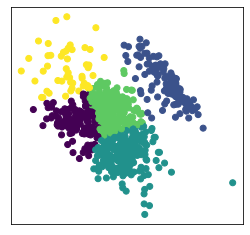

In [18]:
print(kmeans.cluster_centers_.shape)
print(kmeans.labels_.shape)
# predict is the same as labels_ on training data
# but can be applied to new data
print(kmeans.predict(X2).shape)



ax = plt.gca()
ax.scatter(X2[:, 0], X2[:, 1], c=kmeans.labels_)
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())

### Using only 2 Features that I selected [Gene_89 + Gene_221]

(5, 2)
(801,)
(801,)


([], [])

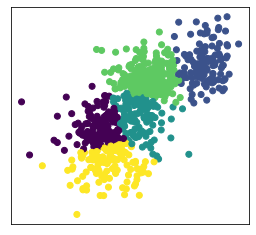

In [19]:
X3=ft3
kmeans1 = KMeans(n_clusters=5, random_state=42).fit(X3)

print(kmeans1.cluster_centers_.shape)
print(kmeans1.labels_.shape)
# predict is the same as labels_ on training data
# but can be applied to new data
print(kmeans1.predict(X3).shape)

ax = plt.gca()
ax.scatter(X3[:, 0], X3[:, 1], c=kmeans1.labels_)
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())

## Visualizing

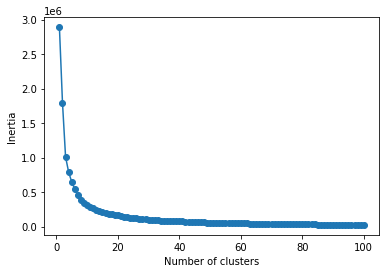

In [20]:
#Fitting K means to view change in Inertia

#container to store inertia scores over iterations
distortions = []

#fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 101):
    km = KMeans(n_clusters=i)
    km.fit(x_pca)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(range(1, 101), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.43856192087507967


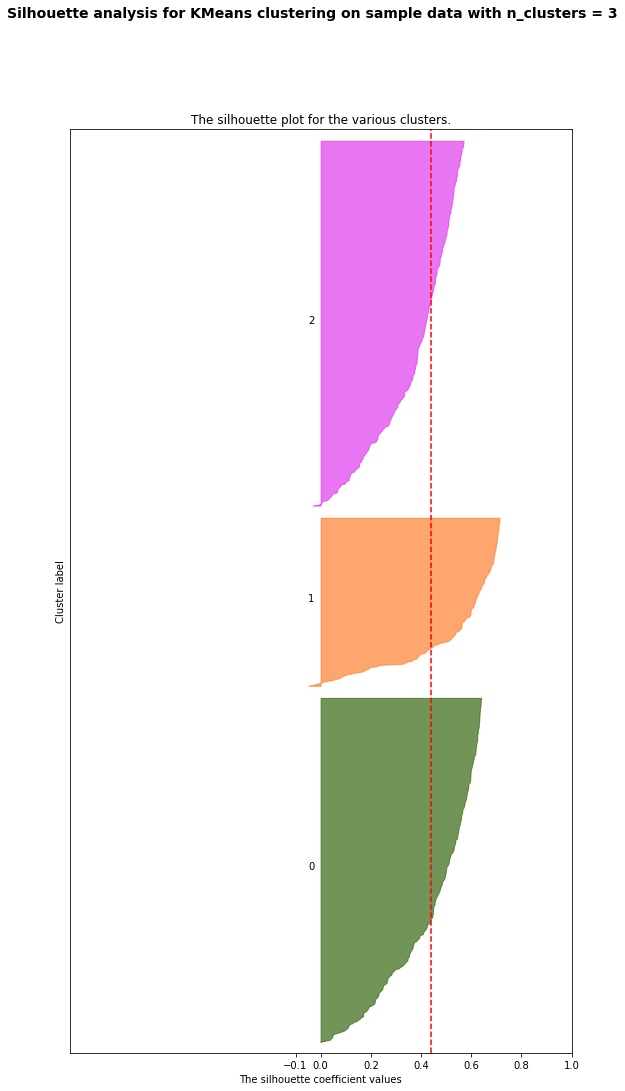

For n_clusters = 5 The average silhouette_score is : 0.39627002705077435


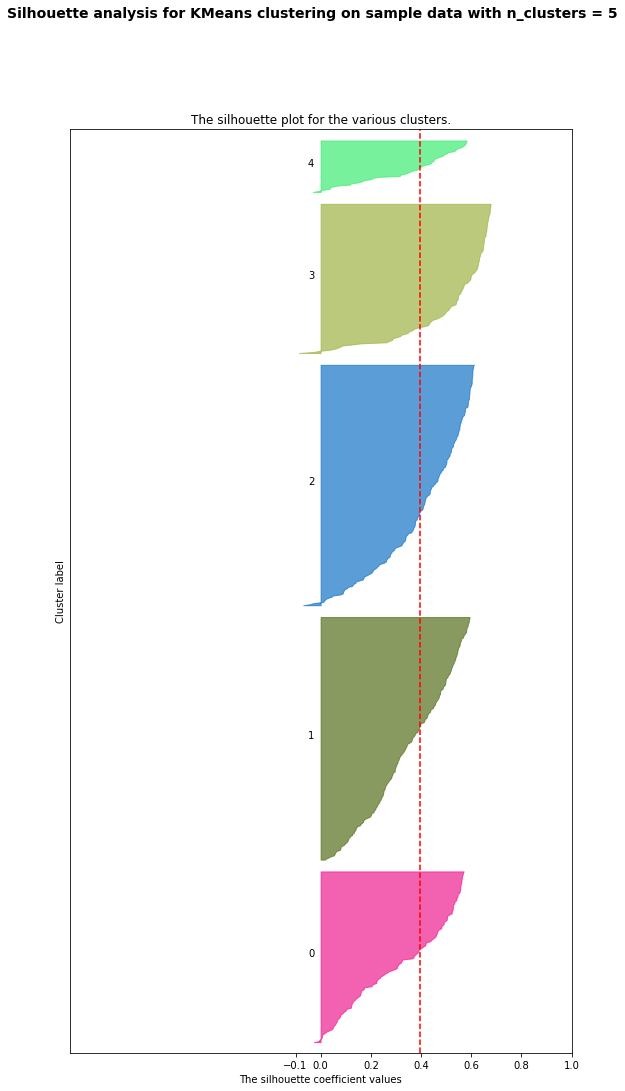

For n_clusters = 6 The average silhouette_score is : 0.40690601704327556


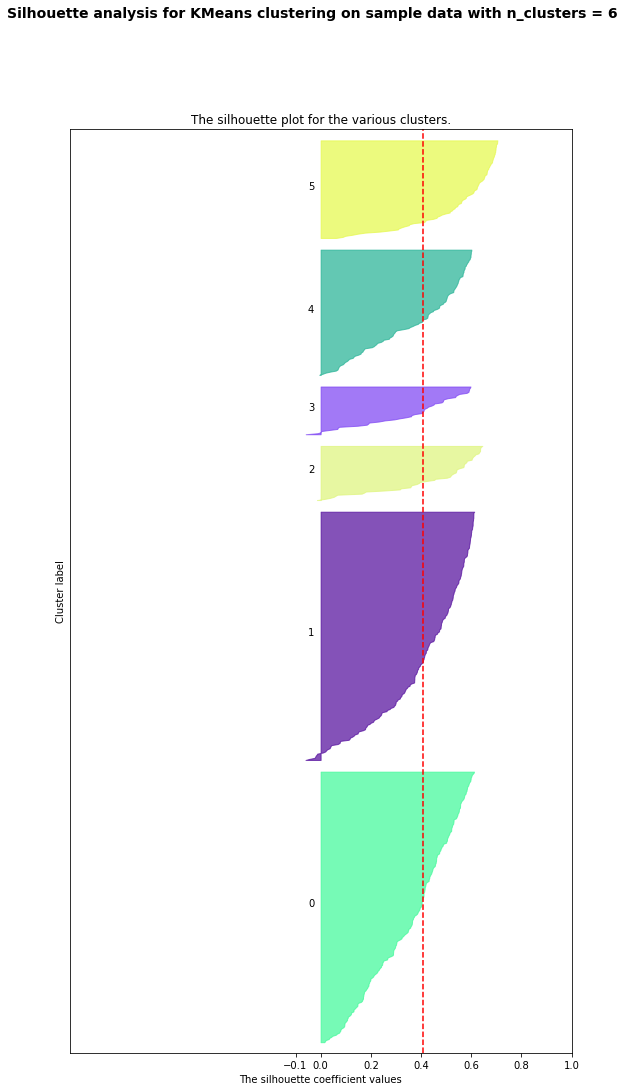

For n_clusters = 10 The average silhouette_score is : 0.3821568839754095


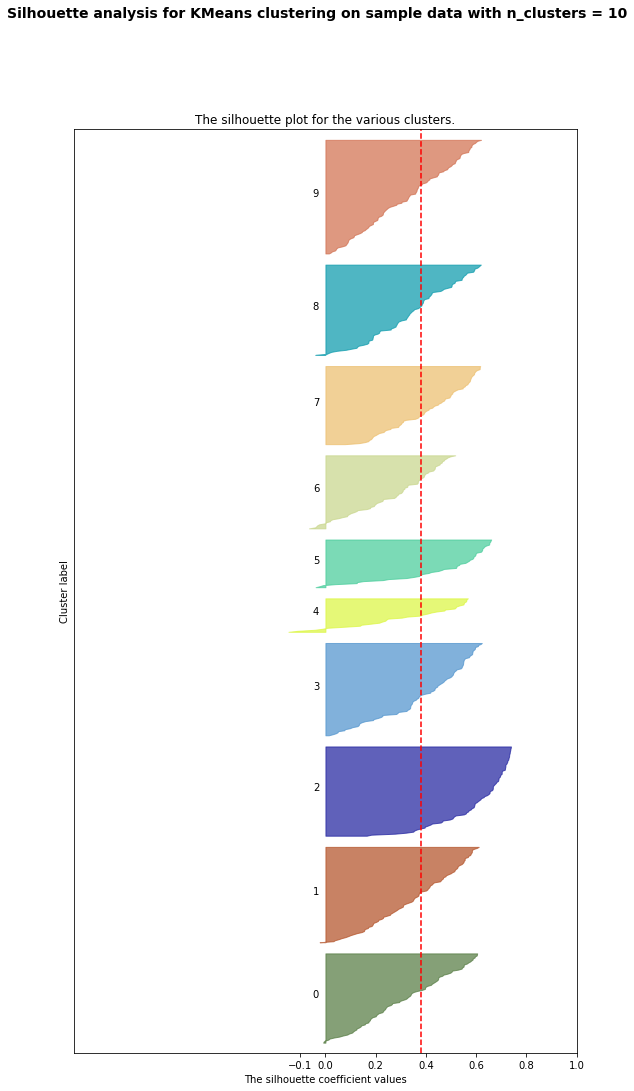

For n_clusters = 15 The average silhouette_score is : 0.35105162144516233


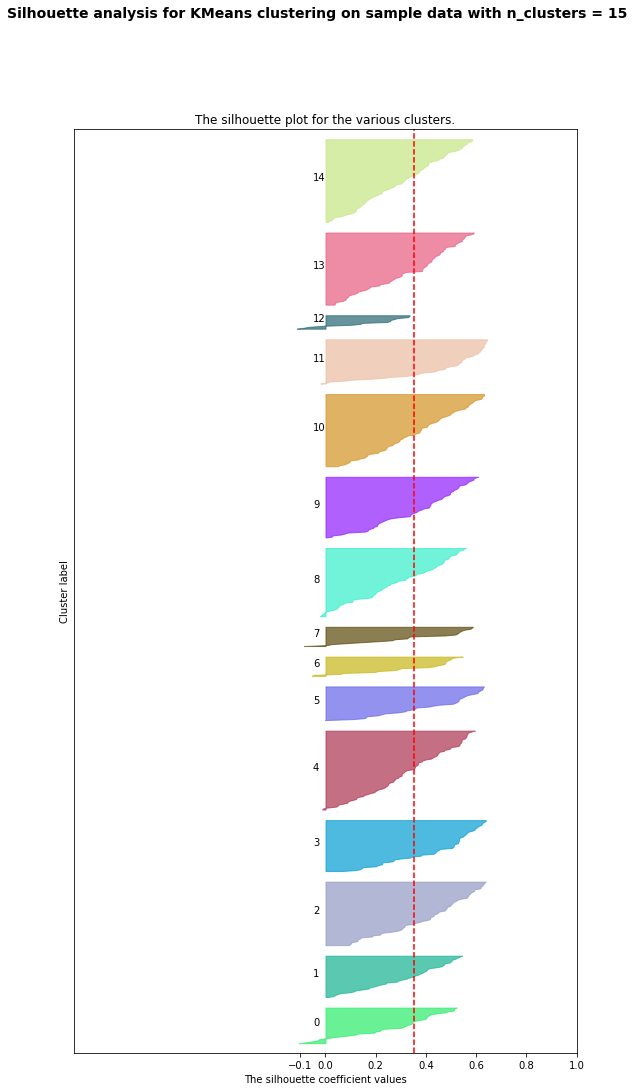

In [21]:
#modify this list to include the numbers of clusters you want to see

range_n_clusters = [3, 5, 6, 10, 15]


for n_clusters in range_n_clusters:
    #Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    #The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-1, 1])
    
    #The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_pca) + (n_clusters + 1) * 10])

    #Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_pca)

    #The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(x_pca, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    #Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        #select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        #Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        #Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    #The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  #Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()